<a href="https://colab.research.google.com/github/fertr98/4GeeksAcademy/blob/master/4geeks_limpieza_bienes_raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Esta parte nos viene dada de antemano

import pandas as pd

# Le añado otras librerías que voy a necesitar
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# this CSV file contains semicolons instead of comas as separator
# He modificado la ruta para acceder al archivo real_estate.csv desde mi drive
ds = pd.read_csv('/content/drive/MyDrive/ESTUDIO/4Geeks/real_estate.csv', sep=';')
ds

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ESTUDIO/4Geeks/real_estate.csv'

In [ ]:
#### Ejercicio 01. ¿Cuál es la casa mas cara en el todo el dataset? (★☆☆)

indice_casa_cara = ds['price'].idxmax()

direccion_cara = ds.loc[indice_casa_cara, 'address']
precio_cara = ds.loc[indice_casa_cara, 'price']

print(f'La casa más cara cuesta {precio_cara} euros y está en {direccion_cara}')

La casa más cara cuesta 8500000 euros y está en El Escorial


In [ ]:
#### Ejercicio 02. ¿Cuál es la casa mas barata del dataset? (★☆☆)

indice_casa_barata = ds['price'].idxmin()


direccion_casa_barata = ds.loc[indice_casa_barata, 'address']
precio_casa_barata = ds.loc[indice_casa_barata, 'price']


print(f'La casa más barata cuesta {precio_casa_barata} euros y está en {direccion_casa_barata}')

La casa más barata cuesta 0 euros y está en Parla


In [ ]:
#### Ejercicio 03. ¿Cuál es la casa mas grande y la mas pequeña del dataset? (★☆☆)

idx_casa_grande = ds['surface'].idxmax()

direccion_grande = ds.loc[idx_casa_grande, 'address']
superficie_grande = ds.loc[idx_casa_grande, 'surface']

idx_casa_pequeña = ds['surface'].idxmin()

direccion_pequeña = ds.loc[idx_casa_pequeña, 'address']
superficie_pequeña = ds.loc[idx_casa_pequeña, 'surface']

print(f'La casa más grande tiene {superficie_grande} y está en  {direccion_grande}')
print(f'La casa más pequeña tiene {superficie_pequeña} y está en {direccion_pequeña}')

La casa más grande tiene 249000.0 y está en  Sevilla la Nueva
La casa más pequeña tiene 15.0 y está en Calle Amparo,  Madrid Capital


In [ ]:
#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

poblaciones_unicas = ds['level5'].drop_duplicates()

print(','.join(poblaciones_unicas))

poblaciones_distintas = ds['level5'].nunique()
print(f'El dataset contiene {poblaciones_distintas} poblaciones.')

Arganda del Rey,Fuenlabrada,Boadilla del Monte,Las Rozas de Madrid, Madrid Capital,Villaviciosa de Odón,Pinto,Valdemoro,Navalcarnero,Pozuelo de Alarcón,Torrejón de Ardoz,Navalagamella,San Sebastián de los Reyes,Rivas-vaciamadrid,Alpedrete,Móstoles,San Fernando de Henares,Coslada,Becerril de la Sierra,Alcalá de Henares,Chinchón,Parla,Alcorcón,El Escorial,Leganés,Pedrezuela,Majadahonda,Villanueva de la Cañada,Villanueva del Pardillo,Torrelodones,Moralzarzal,Mejorada del Campo,Aranjuez,Corpa,Getafe,Velilla de San Antonio,Sevilla la Nueva,San Martín de la Vega,Villalbilla,Collado Villalba,Alcobendas,El Molar (Madrid),Moraleja de Enmedio,Algete,Campo Real,Torrejón de la Calzada,Colmenar Viejo,Valdemorillo,Fuente El Saz de Jarama,Tres Cantos,Arroyomolinos (Madrid),Griñón,Paracuellos de Jarama,Guadarrama,Titulcia,Galapagar,Collado Mediano,Los Molinos,San Lorenzo de El Escorial,Loeches,San Martín de Valdeiglesias,Navas del Rey,Bustarviejo,Manzanares El Real,Carabaña,Casarrubuelos,Cercedilla,Fr

In [ ]:
#### Ejercicio 05. ¿El data set contiene valores no admitidos (NAs)? (★☆☆)

contiene_nas = ds.isna().any()
print(ds.isna())

       Unnamed: 0  id_realEstates  isNew  realEstate_name  phone_realEstate  \
0           False           False  False            False             False   
1           False           False  False            False             False   
2           False           False  False            False             False   
3           False           False  False            False             False   
4           False           False  False            False             False   
...           ...             ...    ...              ...               ...   
15330       False           False  False            False             False   
15331       False           False  False            False             False   
15332       False           False  False            False             False   
15333       False           False  False            False             False   
15334       False           False  False            False             False   

       url_inmueble  rooms  bathrooms  surface  pri

In [ ]:
#### Ejercicio 06. Elimina los NAs del data set, si aplica (★★☆)

dimensiones_tabla_original = ds.shape

tabla_sin_nas = ds.dropna()

dimensiones_sin_nas = tabla_sin_nas.shape

print(f'Dimensiones del DataFrame original: {dimensiones_tabla_original}')
print(f'Dimensiones del DataFrame sin NAs: {dimensiones_sin_nas}')

Dimensiones del DataFrame original: (15335, 37)
Dimensiones del DataFrame sin NAs: (0, 37)


In [ ]:
#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

arroyomolinos = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

media_precios_arroyomolinos = arroyomolinos['price'].mean()

print(f'El precio medio en Arroyomollinos es {media_precios_arroyomolinos} euros')

El precio medio en Arroyomollinos es 294541.59854014596 euros


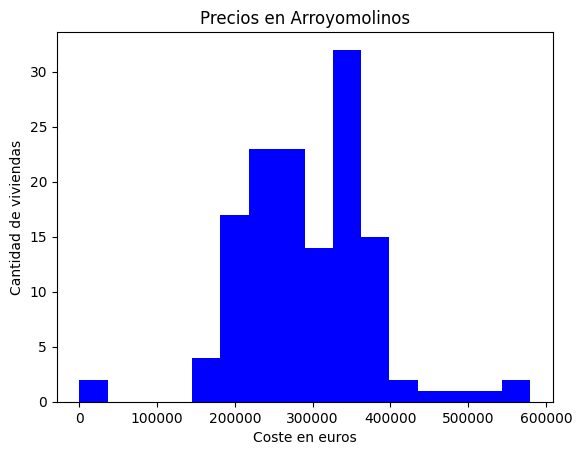

Puede apreciarse que la gran mayoría de viviendas están en un rango de precios de entre casi 200.000 hasta 400.000 euros. Además, las casas de 350.000 euros son las más frecuentes


In [ ]:
#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

arroyomolinos_df = ds[ds['level5'] == 'Arroyomolinos (Madrid)']

plt.hist(arroyomolinos_df['price'], bins=16, color='blue')
plt.title('Precios en Arroyomolinos')
plt.xlabel('Coste en euros')
plt.ylabel('Cantidad de viviendas')
plt.show()

print("Puede apreciarse que la gran mayoría de viviendas están en un rango de precios de entre casi 200.000 hasta 400.000 euros. Además, las casas de 350.000 euros son las más frecuentes")

In [ ]:
#### Ejercicio 09. ¿ Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

valdemorillo = ds[ds['level5'] == 'Valdemorillo']
galapagar = ds[ds['level5'] == 'Galapagar']

precio_prom_valdemorillo = valdemorillo['price'].mean()
precio_prom_galapagar = galapagar['price'].mean()


print(f'Precio promedio en Valdemorillo: {precio_prom_valdemorillo} euros')
print(f'Precio promedio en Galapagar: {precio_prom_galapagar} euros')

print("Como se puede apreciar, el precio medio por vivienda en Valdemorillo y Galapagar es prácticamente el mismo: 360.000-365.000 euros. \n Es posible que si empleamos otras métricas como la desviación estánadr podamos encontrar alguna diferencia")

Precio promedio en Valdemorillo: 363860.2931034483 euros
Precio promedio en Galapagar: 360063.20238095237 euros
Como se puede apreciar, el precio medio por vivienda en Valdemorillo y Galapagar es prácticamente el mismo: 360.000-365.000 euros. 
 Es posible que si empleamos otras métricas como la desviación estánadr podamos encontrar alguna diferencia


In [ ]:
#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (price/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

valdemorillo = ds[ds['level5'] == 'Valdemorillo'].copy() # He usado el .copy() para usar una copia y no el dataset directamente. Si no, nos puede dar un mensaje de error o perjudicarnos en el código más adelante
galapagar = ds[ds['level5'] == 'Galapagar'].copy()

valdemorillo['pps'] = valdemorillo['price'] / valdemorillo['surface']
galapagar['pps'] = galapagar['price'] / galapagar['surface']

media_pps_valdemorillo = valdemorillo['pps'].mean()
media_pps_galapagar = galapagar['pps'].mean()

print(f'En Valdemorillo el precio medio es de {media_pps_valdemorillo} euros por metro cuadrado')
print(f'En Galapagar el preciomedio es de {media_pps_galapagar} euros por metro cuadrado')
print("Dado que en el ejercicio anterior hemos visto que el precio promedio de las viviendas en cada municipio era el mismo, \n si ahora además vemos que el precio promedio en Galapagar es más elevado (1600 frente a 1300), es evidente que \n las viviendas en Galapagar son más pequeñas (de media)")

En Valdemorillo el precio medio es de 1317.9502109024986 euros por metro cuadrado
En Galapagar el preciomedio es de 1606.3240303094024 euros por metro cuadrado
Dado que en el ejercicio anterior hemos visto que el precio promedio de las viviendas en cada municipio era el mismo, 
 si ahora además vemos que el precio promedio en Galapagar es más elevado (1600 frente a 1300), es evidente que 
 las viviendas en Galapagar son más pequeñas (de media)


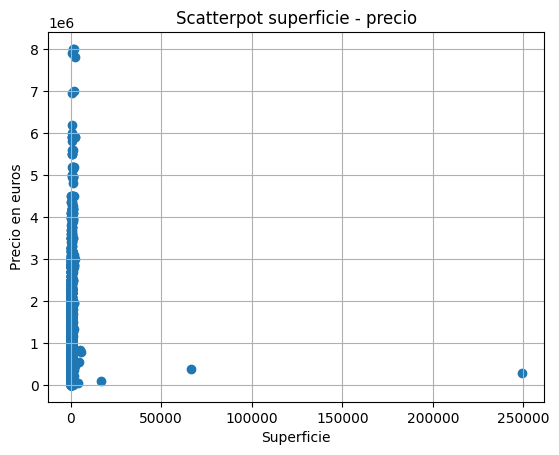

En este caso, es evidente que un par de fincas se han colado en el scatterplot, por lo que sería interesante 
 eliminar estos inmuebles con mucha más superficie que los demás para que el resto de viviendas se repartieran 
 por el gráfico, en lugar de estar todas agrupadas a la izquierda


In [ ]:
#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

import matplotlib.pyplot as plt


plt.scatter(ds['surface'], ds['price'])
plt.title('Scatterpot superficie - precio')
plt.xlabel('Superficie')
plt.ylabel('Precio en euros')
plt.grid(True)
plt.show()

print("En este caso, es evidente que un par de fincas se han colado en el scatterplot, por lo que sería interesante \n eliminar estos inmuebles con mucha más superficie que los demás para que el resto de viviendas se repartieran \n por el gráfico, en lugar de estar todas agrupadas a la izquierda")

In [ ]:
#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

agencias_distintas = ds['realEstate_name'].nunique()


print(f'Hay {agencias_distintas} agencias de bienes raíces distintas en el dataset')

Hay 1821 agencias de bienes raíces distintas en el dataset


In [ ]:
#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

poblac_con_mas_casas = ds['level5'].value_counts().idxmax()
cantidad_casas = ds['level5'].value_counts().max()

print(f'{poblac_con_mas_casas} tiene la mayor cantidad de casas. Un total de {cantidad_casas}')

 Madrid Capital tiene la mayor cantidad de casas. Un total de 6643


In [ ]:
#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Has un subconjunto del Dataframe original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

poblac_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

cinturon_sur = ds[ds['level5'].isin(poblac_cinturon_sur)]

print(cinturon_sur)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

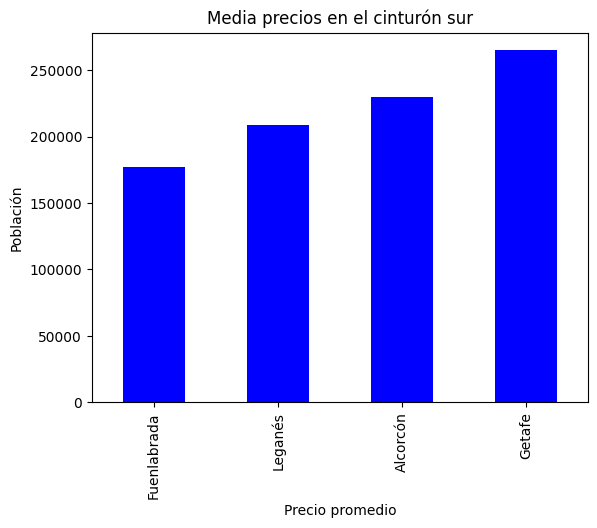

Puede apreciarse que la media de precios en todas las casas del cinturón 
 sur es bastante asequible, perteneciendo todas ellas a un rango medio o 
 medio-bajo de precio.
Dentro de este rango, encontramos que las casas de Fuenlabrada son las más 
 baratas con un precio alrededor de los 180k euros, seguidas por Leganés, 
 Alcorcón y Getafe (que es la más cara de todas, con unos 260k)
Esto puede ser una coincidencia, pero se observa que el intervalo de 
 incremento de precio de una población a la inmediatamente más cara es 
 prácticamente lineal


In [ ]:
#### Ejercicio 15. Traza un gráfico de barra de la media de los precios y explica
#### lo que observas (debes usar el subconjunto obtenido de la pregunta 14) (★★★)

media_precios_cinturon_sur = cinturon_sur.groupby('level5')['price'].mean()

media_precios_cinturon_sur.sort_values().plot(kind='bar', color='blue')
plt.title('Media precios en el cinturón sur')
plt.xlabel('Precio promedio')
plt.ylabel('Población')
plt.show()

# He maquetado el texto para que sea más fácil de leer usando \n
print("Puede apreciarse que la media de precios en todas las casas del cinturón \n sur es bastante asequible, perteneciendo todas ellas a un rango medio o \n medio-bajo de precio.")
print("Dentro de este rango, encontramos que las casas de Fuenlabrada son las más \n baratas con un precio alrededor de los 180k euros, seguidas por Leganés, \n Alcorcón y Getafe (que es la más cara de todas, con unos 260k)")
print("Esto puede ser una coincidencia, pero se observa que el intervalo de \n incremento de precio de una población a la inmediatamente más cara es \n prácticamente lineal")

In [ ]:
#### Ejercicio 16. Calcula la media y la varianza dela muestra para las siguientes
#### variables: precio, habitaciones, superficie y baños (debes usar el subconjunto
#### obtenido en la pregunta 14) (★★★)

medias_varianzas = cinturon_sur[['price', 'rooms', 'surface', 'bathrooms']].agg(['mean', 'var'])

print("Media y varianza para precio, habitaciones, superficie y baños:")
print(medias_varianzas)

Media y varianza para precio, habitaciones, superficie y baños:
             price     rooms      surface  bathrooms
mean  2.230945e+05  3.017738   111.752224   1.633222
var   1.492137e+10  0.718886  4263.051760   0.571797


In [ ]:
# Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset
# obtenido en la pregunta 14 (★★☆)
# Imprime tanto la dirección como el precio de la casa seleccionada de cada población.
# Puedes imprimir un DataFrame o una sola línea para cada población.

poblac_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cinturon_sur = ds[ds['level5'].isin(poblac_cinturon_sur)]

for poblacion in poblac_cinturon_sur:
    subset_poblacion = cinturon_sur[cinturon_sur['level5'] == poblacion]
    indice_casa_cara = subset_poblacion['price'].idxmax()

    direccion_cara = cinturon_sur.loc[indice_casa_cara, 'address']
    precio_cara = cinturon_sur.loc[indice_casa_cara, 'price']

    print(f'La casa más cara de {poblacion} cuesta {precio_cara} euros y está en {direccion_cara}')


La casa más cara de Fuenlabrada cuesta 490000 euros y está en Calle de Paulo Freire, 5, Fuenlabrada
La casa más cara de Leganés cuesta 650000 euros y está en Avenida Reina Sofía, Leganés
La casa más cara de Getafe cuesta 1050000 euros y está en Getafe
La casa más cara de Alcorcón cuesta 950000 euros y está en Alcorcón


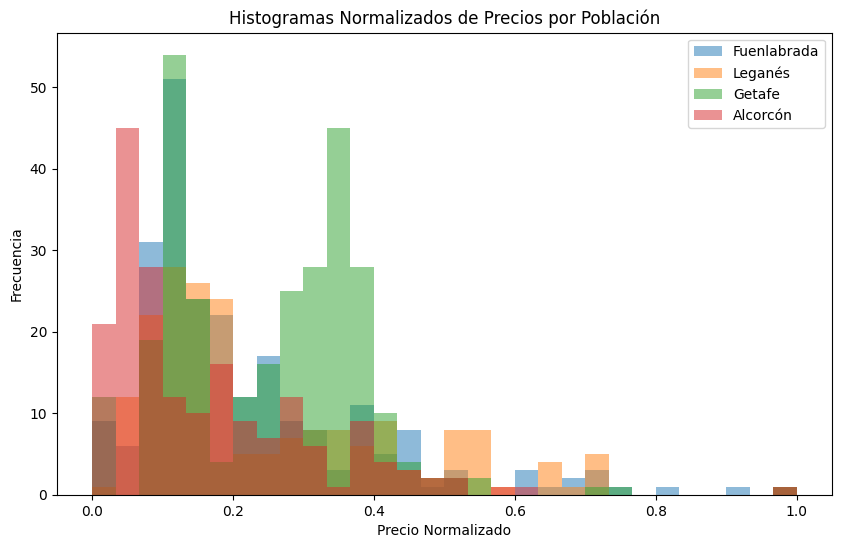

In [ ]:
# Ejercicio 18. Normaliza la variable de precios para cada población y traza los
# 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)
# Para el método de normalización, puedes usar el que consideres adecuado, no hay una única
# respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown
# un breve análisis sobre el gráfico.

#Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

poblac_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cinturon_sur = ds[ds['level5'].isin(poblac_cinturon_sur)]

# Uso MinMaxScaler como metodo de normalización
scaler = MinMaxScaler()

plt.figure(figsize=(10, 6))

for poblacion in poblac_cinturon_sur:
    subset_poblacion = cinturon_sur[cinturon_sur['level5'] == poblacion]

    precios = subset_poblacion['price'].values.reshape(-1, 1)
    precios_normalizados = scaler.fit_transform(precios).flatten()

    plt.hist(precios_normalizados, bins=30, alpha=0.5, label=poblacion)

plt.title('Histogramas Normalizados de Precios por Población')
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.show()


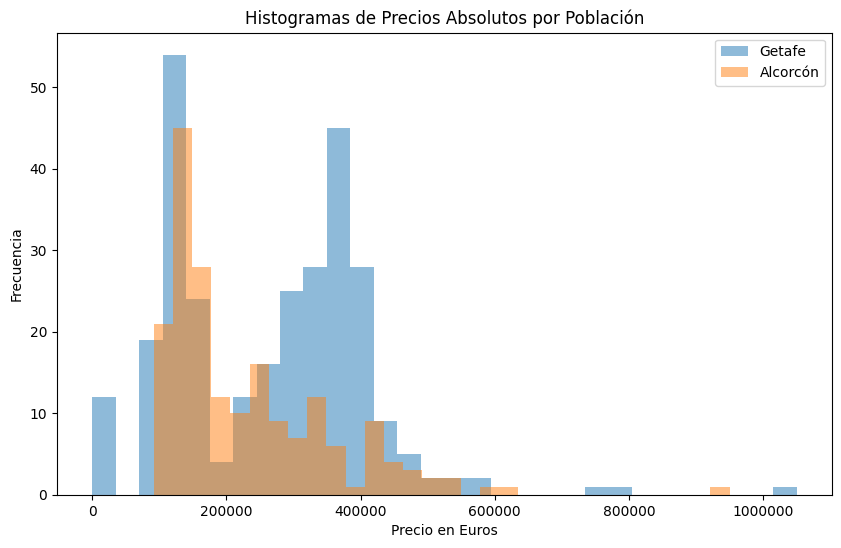

Podemos apreciar que Getafe tiene una distribución de precios con dos puntos altos. El primero de ellos 
 se sitúa ligeramente por encima de los 100k, mientras que el segundo se ubica alrededor de los 350k. 
 Además, se observa que buena parte del precio de las viviendas se agrupa alrededor del segundo
En el caso de Alcorcón, el punto de mayor frecuencia se sitúa junto al más barato de Getafe, pero, 
 a diferencia de Getafe, a partir de ese punto las casas más caras cada vez son más escasas
Evidentemente, esta ausencia de un segundo grupo más caro es lo que explica la diferencia de precio  
 promedio que vimos antes entre Alcorcón y Getafe.


In [ ]:
# Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2)
# entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido
# en la pregunta 14 (★★☆)
# Pista: Crea una nueva columna llamada pps (price per square en inglés) y luego
# analiza los valores

getafe_y_alcorcon = ["Getafe", "Alcorcón"]
dos_poblaciones = ds[ds['level5'].isin(getafe_y_alcorcon)]

plt.figure(figsize=(10, 6))

for poblacion in getafe_y_alcorcon:
    subset_poblacion = dos_poblaciones[dos_poblaciones['level5'] == poblacion]

    precios = subset_poblacion['price']

    plt.hist(precios, bins=30, alpha=0.5, label=poblacion)

# Esta línea es fundamental, porque sin ella se mostraría el gráfico con un rango de 0 a 1 en lugar de ls precios
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Histogramas de Precios Absolutos por Población')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.show()

print("Podemos apreciar que Getafe tiene una distribución de precios con dos puntos altos. El primero de ellos \n se sitúa ligeramente por encima de los 100k, mientras que el segundo se ubica alrededor de los 350k. \n Además, se observa que buena parte del precio de las viviendas se agrupa alrededor del segundo")
print("En el caso de Alcorcón, el punto de mayor frecuencia se sitúa junto al más barato de Getafe, pero, \n a diferencia de Getafe, a partir de ese punto las casas más caras cada vez son más escasas")
print("Evidentemente, esta ausencia de un segundo grupo más caro es lo que explica la diferencia de precio  \n promedio que vimos antes entre Alcorcón y Getafe.")

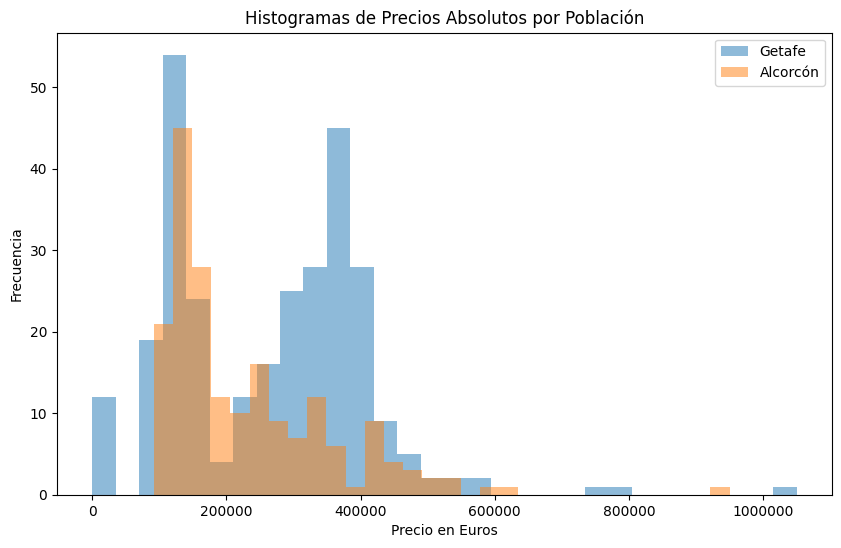

Podemos apreciar que Getafe tiene una distribución de precios con dos puntos altos. El primero de ellos 
 se sitúa ligeramente por encima de los 100k, mientras que el segundo se ubica alrededor de los 350k. 
 Además, se observa que buena parte del precio de las viviendas se agrupa alrededor del segundo
En el caso de Alcorcón, el punto de mayor frecuencia se sitúa junto al más barato de Getafe, pero, 
 a diferencia de Getafe, a partir de ese punto las casas más caras cada vez son más escasas
Evidentemente, esta ausencia de un segundo grupo más caro es lo que explica la diferencia de precio  
 promedio que vimos antes entre Alcorcón y Getafe.


In [ ]:
getafe_y_alcorcon = ["Getafe", "Alcorcón"]
dos_poblaciones = ds[ds['level5'].isin(getafe_y_alcorcon)]

plt.figure(figsize=(10, 6))

for poblacion in getafe_y_alcorcon:
    subset_poblacion = dos_poblaciones[dos_poblaciones['level5'] == poblacion]

    precios = subset_poblacion['price']

    plt.hist(precios, bins=30, alpha=0.5, label=poblacion)

# Esta línea es fundamental, porque sin ella se mostraría el gráfico con un rango de 0 a 1 en lugar de ls precios
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.title('Histogramas de Precios Absolutos por Población')
plt.xlabel('Precio en Euros')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.show()

print("Podemos apreciar que Getafe tiene una distribución de precios con dos puntos altos. El primero de ellos \n se sitúa ligeramente por encima de los 100k, mientras que el segundo se ubica alrededor de los 350k. \n Además, se observa que buena parte del precio de las viviendas se agrupa alrededor del segundo")
print("En el caso de Alcorcón, el punto de mayor frecuencia se sitúa junto al más barato de Getafe, pero, \n a diferencia de Getafe, a partir de ese punto las casas más caras cada vez son más escasas")
print("Evidentemente, esta ausencia de un segundo grupo más caro es lo que explica la diferencia de precio  \n promedio que vimos antes entre Alcorcón y Getafe.")

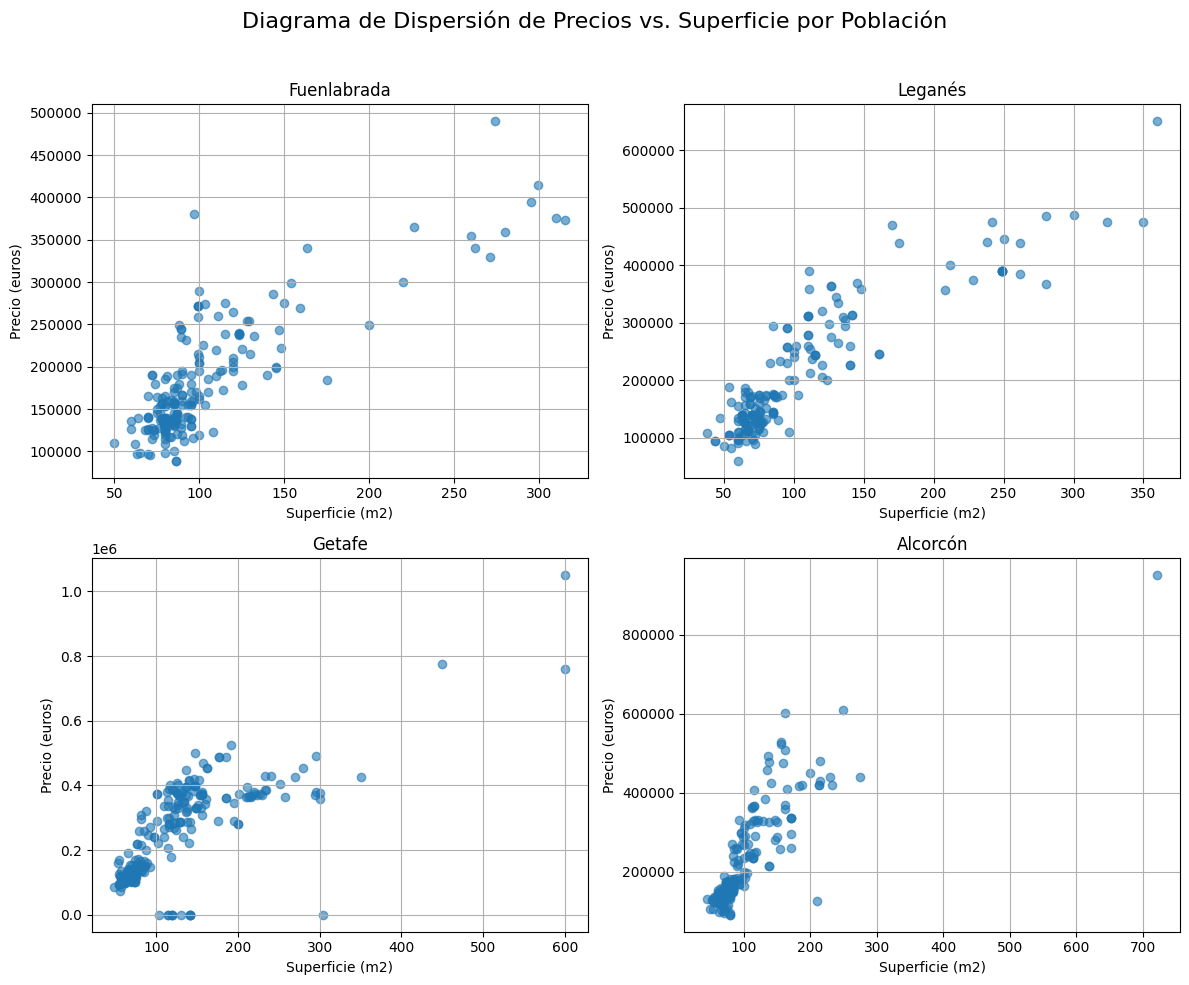

In [ ]:
#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5)
#### y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)
#### Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

poblaciones = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cinturon_sur = ds[ds['level5'].isin(poblaciones)]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Diagrama de Dispersión de Precios vs. Superficie por Población', fontsize=16)

for i, poblacion in enumerate(poblaciones):

    subset = cinturon_sur[cinturon_sur['level5'] == poblacion]

    # Con esto saco los ejes. La idea es que emplea los valores que toma i y los
    # agrupa usando su modularidad. Es decir, según sea su resto en relación a 2 (en este caso)
    # los va ubicando en cuadrantes.
    ax = axs[i // 2, i % 2]

    # Genero el diagrama de dispersión
    ax.scatter(subset['surface'], subset['price'], alpha=0.6)

    ax.set_title(poblacion)
    ax.set_xlabel('Superficie (m2)')
    ax.set_ylabel('Precio (euros)')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud)
# del cinturón sur de Madrid por color de cada población (debes usar el subconjunto
# obtenido del Ejercicio 14) (★★★★)


# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud

#map

from ipyleaflet import Map, Marker, Icon, basemaps

poblac_cinturon_sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cinturon_sur = ds[ds['level5'].isin(poblac_cinturon_sur)]

# Me creo el diccionario
colores_poblaciones = {
    "Fuenlabrada": "blue",
    "Leganés": "green",
    "Getafe": "orange",
    "Alcorcón": "red"
}

# Mapa compartido por Daniela
map = Map(basemap=basemaps.OpenStreetMap.Mapnik, center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20)


#marcadores = []

#for index, row in cinturon_sur.iterrows():
    #poblacion = row['level5']
    #latitud = row['latitude']
    #longitud = row['longitude']

    # Crear un marcador para cada coordenada
    #marker = {
        #"location": (latitud, longitud),
        #"color": colores_poblaciones.get(poblacion, "black"),
        #"title": f"{row['address']} - {poblacion}"
    #}

    #marcadores.append(marker)


#for marker in marcadores:
    #map.add_layer(Marker(location=marker["location"],
                         #draggable=False,
                         #title=marker["title"],
                         #icon=Icon(color=marker["color"])))

# Mostrar el mapa
#map




Map(center=[40.35, -3.83], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…